In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import pi


In [11]:
def f(x):
    return (x*np.sin(10*x*np.pi)+1)  # function to be MAXIMIZED

No handles with labels found to put in legend.


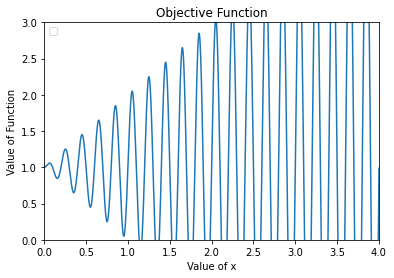

In [12]:
x = np.arange(-0.5, 1, 0.0001)
y = f(x)
plt.plot(x,y)
plt.xlabel('Value of x')
plt.ylabel('Value of Function')
plt.title('Objective Function')
plt.legend()
plt.show()



In [13]:
def initialize_population(population_size):
    population = []
    for j in range(population_size):
        x1 = np.random.uniform(low =-0.5, high =1)   #Value that will determine the sign of the candidate solution
        x2 = np.random.randint(low=0, high=9, size = 4)
        x = np.append(x1,x2)
        population = np.append(population,x)
    population = np.split(population, population_size)
    return population

#initialize_population(100)

In [14]:
def double_point_crossover(parents, num_offspring):
    children = []
    for i in range(int(num_offspring/2)):
        index1 = np.random.randint(low=0, high=9)
        index2 = np.random.randint(low=0, high=9)
        parent1 = parents[index1]
        parent2 = parents[index2]
        offspring1 = np.append(parent1[0:2],parent2[2:4])
        offspring1 = np.append(offspring1 ,parent1[4:])
        offspring2 = np.append(parent2[0:2],parent1[2:4])
        offspring2 = np.append(offspring2, parent2[4:])
        children = np.append(children, offspring1)
        children = np.append(children, offspring2)
    children = np.split(children, num_offspring)
    return children


In [15]:
def mutation(children, prop):
    num_offspring = len(children)
    for i in range(num_offspring):
        for j in range(1,5):
            probability = np.random.uniform(low=0, high=1)
            if probability < prop:
                random_value = np.random.randint(low=0, high=9)
                children[i][j] = random_value
    return children


In [9]:
def evaluate_fitness(population):
    population_size = len(population)
    fitness = []
    bestx, fitx = -1, 0
    for j in range(population_size):
        ind = population[j]
        if ind[0]>=0:
            sign = 1
        else:
            sign = -1
        x = sign*float("0"+"."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4]))))
        if float(x)<-0.5 or float(x)>1: 
            fit = f(0.25)         
        else:
            fit = f(x)
        fitness = np.append(fitness,fit)
        if bestx:
            if fit > fitx:
                fitx = fit
                bestx = x
        else:
            fitx = fit
            bestx = x
    return fitness, bestx

'\ndef evaluate_fitness(population):\n    population_size = len(population)\n    fitness = []\n    bestx, fitx = -1, 0\n    for j in range(population_size):\n        ind = population[j]\n        if ind[0]>=0:\n            sign = 1\n        else:\n            sign = -1\n        x = sign*float("0"+"."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4]))))\n        if float(x)<-0.5 or float(x)>1: \n            fit = f(0.25)         \n        else:\n            fit = f(x)\n        fitness = np.append(fitness,fit)\n        if bestx:\n            if fit > fitx:\n                fitx = fit\n                bestx = x\n        else:\n            fitx = fit\n            bestx = x\n    return fitness, bestx\n'

In [10]:
def selection(population, fitness, num_parents):
    parents =[]
    for i in range(int(num_parents)):
        if fitness[i] > fitness[-i]:
            parents = np.append(parents, population[i])
        else:
            parents = np.append(parents, population[-i])
    parents = np.split(parents, num_parents)
    return parents        

In [599]:
def genetic_algorithm(num_generations, population_size, prop=0.5):
    population = initialize_population(population_size)
    best, avg, worst, bestx = [], [], [], []
    
    for gen in range(num_generations):
        fitness, bx = evaluate_fitness(population)
       
        best.append(np.max(fitness))
        avg.append(np.mean(fitness))
        worst.append(np.min(fitness))
        
        bestx.append(bx) 
        
        parents = selection(population,fitness,num_parents =int(population_size/2))
        children = double_point_crossover(parents, num_offspring = int(population_size/2))
        children = mutation(children,prop=0.5)
        population  = np.append(parents,children)
        population = np.split(population, population_size)
    
    fitness, bx = evaluate_fitness(population)
    best.append(np.max(fitness))
    avg.append(np.mean(fitness))
    worst.append(np.min(fitness))
    bestx.append(bx)
    print(np.mean(fitness))
    best_solution_index = np.argmax(fitness)
    best_OF_value = max(fitness)
    
    ind = population[best_solution_index]
    if ind[0]>=0:
        sign = 1
    else:
        sign = -1
    best_solution = sign*float(str((int(ind[1])))+"."+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4]))))
    
    return best_OF_value, best_solution, best, avg, worst, bestx

1.5945582785047614
The largest value of the objective function is:  1.8505951991116696
The corresponding solution is x =  0.8512


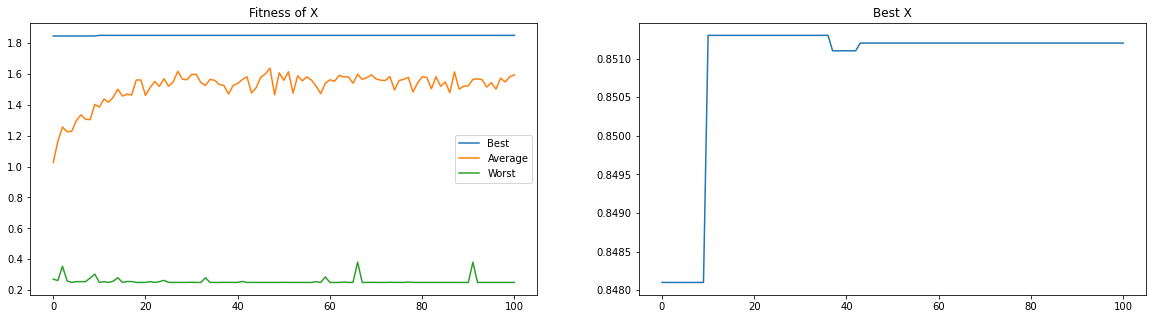

No handles with labels found to put in legend.


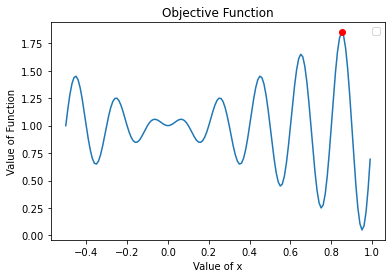

In [600]:
best_OF_value, best_solution, best, avg, worst, bestx = genetic_algorithm(num_generations = 100, population_size=100, prop = 0.01)
print("The largest value of the objective function is: ",  best_OF_value)
print("The corresponding solution is x = ",  bestx[-1])

plt.figure(figsize=(20,5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.title.set_text('Fitness of X')
ax2.title.set_text('Best X')

ax1.plot(best)
ax1.plot(avg)
ax1.plot(worst)
ax1.legend(["Best", "Average", "Worst"])

ax2.plot(bestx)
plt.show()

z = f(best_solution)
x = np.arange(-0.5, 1, 0.01)
y = f(x)
ax = plt.subplot(111)
ax.plot(x,y)
ax.plot(bestx[-1],best_OF_value,'ro')
ax.set_xlabel('Value of x')
ax.set_ylabel('Value of Function')
ax.set_title('Objective Function')
ax.legend()
plt.show() 

#Question 1

In [622]:

def f(x):
    return (x*np.sin(10*x*np.pi)+1) # function to be MAXIMIZED

def initialize_population1(population_size):
    population = []
    for j in range(population_size):
        x = np.random.uniform(low =-0.5, high =1) #Value that will determine the sign of the candidate solution
        x = np.around(x,4)
        population.append(x)
    return population

def evaluate_fitness1(population):
    population_size = len(population)
    fitness = []
    bestx, fitx = -1, 0
    for j in range(population_size):
        if float(population[j])<-0.5 or float(population[j])>1: #Solutions that violate the constraints will be penalized with low fitness value
            fit = f(0.25)         
        else:
            fit = f(population[j])
        fitness.append(fit)
        if bestx:
            if fit > fitx:
                fitx = fit
                bestx = population[j]
        else:
            fitx = fit
            bestx = population[j]
    return fitness, bestx


def selection1(population, fitness, num_parents):
    parents =[]
    for i in range(num_parents):
        if fitness[i] > fitness[num_parents*2-i-1]:
            parents.append(population[i])
        else:
            parents.append(population[num_parents*2-i-1])
    return parents

def mutation1(children):
    num_offspring = len(children)
    for i in range(num_offspring):
        probability = np.random.uniform(low=0, high=1)
        if probability < 0.1:
            random_value = np.random.random_sample()
            children[i] = np.around((children[i] + 0.01 * random_value),4)
    return children   


The largest value of the objective function is:  1.8358667444951955
The corresponding solution is x =  0.8571


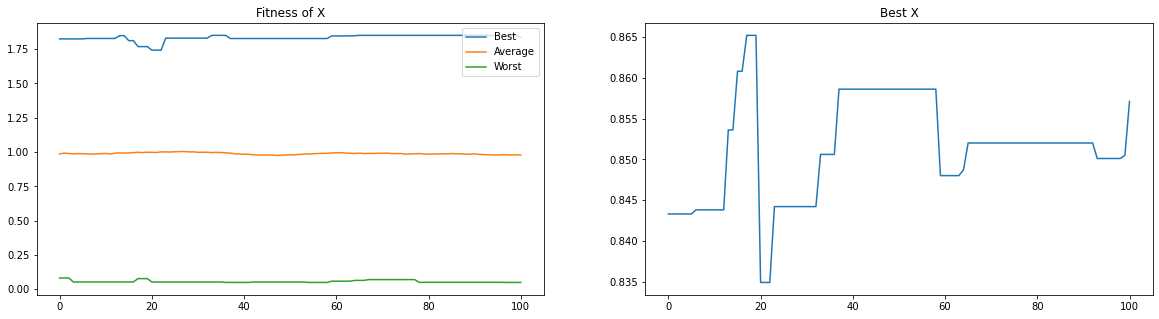

No handles with labels found to put in legend.


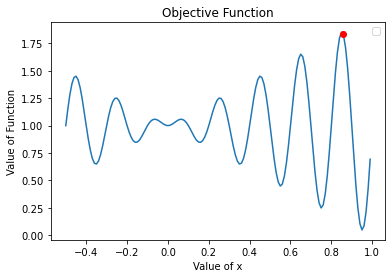

In [623]:
def genetic_algorithm1(num_generations, population_size):
    population = initialize_population1(population_size)
    best, avg, worst, bestx = [], [], [], []
    
    for gen in range(num_generations):
        fitness, bx = evaluate_fitness1(population)
        #print(len(fitness))
        best.append(np.max(fitness))
        avg.append(np.mean(fitness))
        worst.append(np.min(fitness))
        bestx.append(bx) 

        population = mutation1(population)
        
    fitness, bx = evaluate_fitness1(population)
    best.append(np.max(fitness))
    avg.append(np.mean(fitness))
    worst.append(np.min(fitness))
    bestx.append(bx)
    
    best_solution_index = np.argmax(fitness)
    best_OF_value = max(fitness)
    
    ind = population[best_solution_index]
    if ind>=0:
        sign = 1
    else:
        sign = -1
    best_solution = sign*ind
    
    return best_OF_value, best_solution, best, avg, worst, bestx
#----------------------------------------------------------------------------
best_OF_value, best_solution, best, avg, worst, bestx = genetic_algorithm1(num_generations = 100, population_size=100)
print("The largest value of the objective function is: ",  best_OF_value)
print("The corresponding solution is x = ",  bestx[-1])

plt.figure(figsize=(20,5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.title.set_text('Fitness of X')
ax2.title.set_text('Best X')

ax1.plot(best)
ax1.plot(avg)
ax1.plot(worst)
ax1.legend(["Best", "Average", "Worst"])

ax2.plot(bestx)
plt.show()

z = f(best_solution)
x = np.arange(-0.5, 1, 0.01)
y = f(np.array(x))
ax = plt.subplot(111)
ax.plot(x,y)
ax.plot(bestx[-1],best_OF_value,'ro')
ax.set_xlabel('Value of x')
ax.set_ylabel('Value of Function')
ax.set_title('Objective Function')
ax.legend()
plt.show() 